## Time Series of Inter-Country Inequality in Available Calories per Person

The data is taken from [gapminder](https://www.gapminder.org/data/). The data represents daily available food supply, defined [here](https://docs.google.com/spreadsheets/d/14G6CjF6NblTGf6kkQclpXp3XZ3D4Nkw1I92DB4fOjXo/pub?gid=0#):

> The total supply of food available in a country, divided by the population and 365 (the number of days in the year).

This represents the amount of available food per person in a country. There are 151 countries and 47 years, ranging from 1961 to 2007. Additional details on the data can be found at the end of this document.

The inter-country inequality is defined in two different ways and plotted as a time series.


In [70]:
# Calculate data summary.
qty_countries = len(data.index)
qty_years = len(data.columns)
min_year = list(data.columns)[0]
max_year = list(data.columns)[-1]
print(
    'there are %s countries and %s years, ranging from %s to %s.' % (
        qty_countries,
        qty_years,
        min_year,
        max_year
    )
)

there are 151 countries and 47 years, ranging from 1961 to 2007.


# Importing Data


The data was cleaned and saved in [this notebook](https://github.com/def-mycroft/gapminder_data/blob/master/wrangling_food_kilocalories.ipynb).

In [79]:
import pandas as pd
import numpy as np
import pickle_funcs as pk
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
data_dict = pk.unpickle_object('data')

In [81]:
data_dict.keys()

dict_keys(['stdevs', 'averages', 'data'])

In [82]:
data = data_dict['data']
averages = data_dict['averages']
stdevs = data_dict['stdevs']

# Measure of Inequality

One way to do this is to just compare the 20th percentile with the 80th. 

In [139]:
"""Define functions which create Series of inequality measures."""


def calc_inequality_v1(data, year, verbose=False):
    """Calculates difference between 20th and 80th percentile as a percent of the 20th."""
    percentile_20th = data[year].quantile(q=0.20)
    percentile_80th = data[year].quantile(q=0.80)

    inequality = 100 * (percentile_80th - percentile_20th) / percentile_20th
    inequality = round(inequality, 2)
    
    if verbose:
        print('')
        print('Inequality in %s was %s percent.' % (year, inequality))
        print('The 20th percentile was %s, the 80th was %s.' % (percentile_20th, percentile_80th))
    
    else:
        return inequality


def calc_inequality_v2(data, year, verbose=False):
    """Calculates availability of the lower class as a percentage of the upper class."""
    # Average of values below the 20th percentile.
    percentile_20th = data[year][data[year] <= data[year].quantile(q=0.20)].mean()
    # Average of values above the 80th percentile.
    percentile_80th = data[year][data[year] >= data[year].quantile(q=0.80)].mean()

    # Average availability of the lower class as a percentage of the upper class.
    # i.e. if the lower/upper class has 1500/3000 calories, the measure is 50%. 
    inequality = 100 * (percentile_20th / percentile_80th)
    inequality = round(inequality, 2)
    
    if verbose:
        print('')
        print('Average availability of the lower class as a percentage of the upper class.')
        print('For example, if the lower/upper class has 1500/3000 calories, the measure is 50%.')
        print('Equality in %s was %s percent.' % (year, inequality))
        print(
            'The average of values below the 20th percentile was %s, average of values above the 80th was %s.'
            % (
                round(percentile_20th,2), 
                round(percentile_80th,2)
            )
        )
        print( )
    
    else:
        return inequality


def create_series(data, function_to_apply, series_name):
    """Applies a function across columns of a dataframe and returns a new series."""
    values = []
    years = []
    
    for col in range(len(data.columns)):
        year = (data.columns[col])
        cell = function_to_apply(data, year)
        values.append(cell)
        years.append(year)
        
    return pd.Series(values, index=years, name=series_name)

## Plot a Simple Inequality Measure

The difference between the value of the 80th percentile and the value of the 20th percentile as a percentage of the 20th percentile. Since this represents the difference between the two classes, a higher level of equality between countries means a lower value.


Inequality in 2007 was 39.38 percent.
The 20th percentile was 2282.06, the 80th was 3180.69.

Inequality in 1961 was 49.54 percent.
The 20th percentile was 1784.67, the 80th was 2668.87.


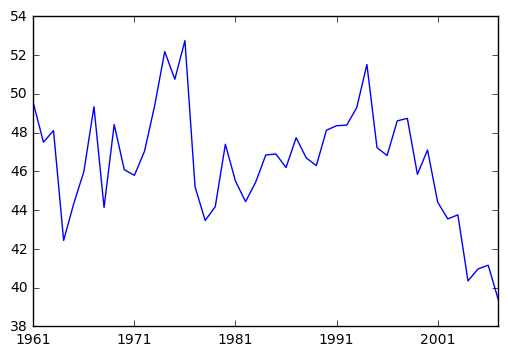

In [140]:
# Create a series representing the inequality measure for all years in the dataset.
inequality_version1 = create_series(data, calc_inequality_v1, 'Inequality')
# Calculate data for 2007 and display.
calc_inequality_v1(data, '2007', verbose=True)
# Calculate data for 1961 and display.
calc_inequality_v1(data, '1961', verbose=True)
# Create a plot of the data from 1961 to 2007
inequality_version1.plot()

## Plot Differences between upper and lower classes

The average of the lower class is shown as a percentage of the upper class. 


Average availability of the lower class as a percentage of the upper class.
For example, if the lower/upper class has 1500/3000 calories, the measure is 50%.
Equality in 2007 was 60.28 percent.
The average of values below the 20th percentile was 2082.2, average of values above the 80th was 3454.07.


Average availability of the lower class as a percentage of the upper class.
For example, if the lower/upper class has 1500/3000 calories, the measure is 50%.
Equality in 1961 was 55.66 percent.
The average of values below the 20th percentile was 1684.13, average of values above the 80th was 3025.82.



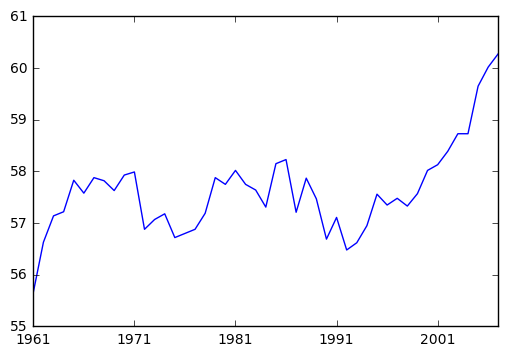

In [141]:
# Create a series representing the inequality measure for all years in the dataset.
inequality_version2 = create_series(data, calc_inequality_v2, 'Inequality')
# Calculate data for 2007 and display.
calc_inequality_v2(data, '2007', verbose=True)
# Calculate data for 1961 and display.
calc_inequality_v2(data, '1961', verbose=True)
# Create a plot of the data from 1961 to 2007
inequality_version2.plot()

# Data Details


## List of Countries

In [142]:
data.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000
mean,2233.340265,2253.774768,2264.177682,2291.149404,2311.418411,2326.584437,2336.980132,2356.097417,2373.396358,2392.855762,...,2611.576225,2629.156159,2644.481722,2658.319073,2668.592252,2679.39755,2689.561589,2704.593841,2718.390132,2735.693974
std,483.999292,474.095475,472.503672,469.251878,467.723185,473.609592,467.098009,471.508016,478.872896,479.231366,...,526.986766,529.724632,525.311253,523.239077,521.798445,516.82439,517.717543,506.777333,502.047221,499.391864
min,1417.730000,1449.530000,1434.390000,1443.270000,1532.860000,1581.880000,1594.300000,1585.170000,1559.570000,1672.790000,...,1668.250000,1614.170000,1596.680000,1552.900000,1546.670000,1558.01000,1564.610000,1566.410000,1584.910000,1605.080000
25%,1854.805000,1885.425000,1898.180000,1932.540000,1945.670000,1995.895000,1994.205000,2006.785000,2010.380000,2059.020000,...,2169.605000,2205.640000,2190.510000,2240.300000,2248.485000,2233.67000,2246.730000,2283.245000,2295.965000,2326.855000
50%,2121.050000,2156.790000,2158.900000,2216.800000,2234.910000,2217.190000,2246.220000,2247.160000,2252.230000,2273.910000,...,2564.690000,2561.060000,2596.350000,2611.720000,2640.400000,2657.26000,2665.070000,2694.120000,2704.170000,2717.570000
75%,2485.580000,2543.990000,2583.110000,2602.215000,2606.570000,2633.070000,2663.315000,2694.260000,2662.775000,2727.790000,...,3013.485000,3064.155000,3052.915000,3062.715000,3056.605000,3073.14500,3075.785000,3086.935000,3097.880000,3111.365000
max,3544.570000,3459.580000,3386.000000,3422.750000,3437.060000,3522.490000,3479.760000,3465.830000,3490.960000,3482.970000,...,3726.510000,3790.660000,3809.100000,3816.930000,3753.780000,3750.54000,3785.300000,3795.800000,3766.280000,3818.800000


In [143]:
data['2007']

Country
Albania                 2879.57
Algeria                 3153.38
Angola                  1973.29
Antigua and Barbuda     2368.50
Argentina               2940.98
Australia               3227.05
Austria                 3818.80
Bahamas                 2712.50
Bangladesh              2281.18
Barbados                3055.81
Belgium                 3693.57
Belize                  2717.57
Benin                   2532.92
Bermuda                 2597.99
Bolivia                 2064.13
Botswana                2263.82
Brazil                  3112.51
Brunei                  2968.12
Bulgaria                2766.11
Burkina Faso            2676.91
Burundi                 1684.72
Cambodia                2267.55
Cameroon                2269.12
Canada                  3532.47
Cape Verde              2571.92
Central African Rep.    1985.84
Chad                    2055.82
Chile                   2920.42
China                   2980.54
Colombia                2684.65
                         ...   


In [60]:
for item in data.index:
    print(item)

Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Australia
Austria
Bahamas
Bangladesh
Barbados
Belgium
Belize
Benin
Bermuda
Bolivia
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Rep.
Chad
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Cuba
Cyprus
Denmark
Djibouti
Dominica
Dominican Rep.
Ecuador
Egypt
El Salvador
Ethiopia
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Kiribati
Korea, Dem. Rep.
Korea, Rep.
Kuwait
Laos
Lebanon
Lesotho
Liberia
Libya
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Mongolia
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
Netherlands Antilles
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Romania
